# Previsione della progressione del Diabete in Pazienti a Rischio

---
MedPredict ha deciso di implementare un modello di regressione predittiva che, utilizzando dati clinici dei pazienti, possa fornire previsioni accurate sulla progressione della malattia.


DATASET USATO
---
---
Il dataset scelto per questo progetto è il Diabetes dataset fornito da scikit-learn, che contiene informazioni cliniche su pazienti affetti da diabete e un target che rappresenta la progressione della malattia. Le variabili indipendenti includono parametri come:

1. Age: età del paziente
2. Sex: genere
3. BMI: indice di massa corporea
4. BP: pressione sanguigna media
5. S1: colesterolo sierico totale
6. S2: lipoproteine a bassa densità
7. S3: lipoproteine ad alta densità
8. S4: rapporto tra colesterolo totale e HDL
9. S5: trigliceridi
10. S6: livello di glicemia


Il target è una misura quantitativa che riflette la progressione del diabete.

Obiettivo del Progetto
---
---
Il nostro obiettivo è sviluppare un modello di regressione che, utilizzando i dati clinici disponibili, riesca a prevedere la progressione della malattia per ciascun paziente. La soluzione sarà integrata nei sistemi aziendali di gestione sanitaria per fornire previsioni personalizzate e dati predittivi ai medici, aiutandoli a prendere decisioni più informate.


Passaggi per la Realizzazione del Modello
---
---

1. Caricamento del Dataset
---

Il dataset sarà caricato utilizzando la funzione `('load_diabetes')` della libreria scikit-learn. Questo permetterà di accedere rapidamente ai dati necessari per il training del modello.
2. Analisi Esplorativa dei Dati (EDA)
---

In questa fase, verrà eseguita una prima esplorazione delle variabili per comprendere meglio le correlazioni tra di esse e il target. Verranno utilizzate visualizzazione come scatter plot e heatmap per identificare eventuali pattern e relazioni tra variabili come BMI,BP, e S5, che potrebbero avere una maggiore influenza sulla progressione del diabete.

3. Pulizia e Pre-processing dei Dati
---
Verranno affrontati eventuali valori mancanti o anomalie nei dati. Le variabili numeriche standardizzate per garantire che abbiano la stessa scala, mentre le variabili categoriche come il genere, verranno codificate usando tecniche di encoding.
4. Selezione delle variabili
---
La selezione delle variabili è cruciale per migliorare la precisione del modello e ridurre la complessità computazionale. Tecniche come l'analisi della correlazione e la Regressione Lasso saranno utilizzate per identificare le variabili più influenti sulla progressione del diabete.
5. Creazione del Modello di Regressione
---

Una volta selezionate le variabili più rilevanti, si procederà alla creazione del modello di regressione
6. Valutazione del Modello
---
Il modello finale sarà valutato utilizzando metriche di regressione come il Mean Squared Error (MSE) e il R-squared (R²). Le prestazioni del modello saranno confrontate con modelli di base per assicurarsi che il sistema offra un significativo miglioramento.
7. Esportazione del modello
---
Una volta ottenuto il modello ottimale, verrà esportato utilizzando pickle per essere integrato nella piattaforma sanitaria di MedPredict, pronta per l'utilizzo in un contesto clinico reale.

8. Conclusione
---
La realizzazione di questo modello di previsione della progressione del diabete rappresenta un enorme valore aggiunto per MedPredict s.r.l. e per i professionisti sanitari che collaborano con l'azienda. Grazie a questo strumento, i medici potranno adottare un approccio più proattivo nella gestione del diabete, migliorando la qualità della vita dei pazienti e ottimizzando le risorse sanitarie. L'accuratezza del modello permetterà decisioni cliniche più precise e un monitoraggio più efficiente delle malattie croniche.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score # metriche MSE e R2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve


RANDOM_STATE = 0

## 1. Caricamento del Dataset

In [ ]:
help(load_diabetes)

Help on function load_diabetes in module sklearn.datasets._base:

load_diabetes(*, return_X_y=False, as_frame=False, scaled=True)
    Load and return the diabetes dataset (regression).
    
    ==============   ==================
    Samples total    442
    Dimensionality   10
    Features         real, -.2 < x < .2
    Targets          integer 25 - 346
    ==============   ==================
    
    .. note::
       The meaning of each feature (i.e. `feature_names`) might be unclear
       (especially for `ltg`) as the documentation of the original dataset is
       not explicit. We provide information that seems correct in regard with
       the scientific literature in this field of research.
    
    Read more in the :ref:`User Guide <diabetes_dataset>`.
    
    Parameters
    ----------
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
    

In [ ]:
diabetes = load_diabetes(as_frame=True,scaled=False)

In [ ]:
df = diabetes.data

In [ ]:
target = diabetes.target

In [ ]:
target

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [ ]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


In [ ]:
print(diabetes.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In seguito a caricamento del dataset con as_frame=True (per ottenere il dataframe pandas) e con scaled= False in maniera da avere i dati raw.

Notiamo dalla documentazione che alcune features non sono torppo spiegate come ad esempio l'encoding di "sex" che non ci dice a cosa corrisponde l'uomo e a cosa corrisponde la donna.

Supporremmo che 1 = uomo e 2 = donna.

Inoltre tutti i valori sono già di tipo numerico e non ci sono nemmeno valori mancanti.

## 2. Analisi esplorativa dei Dati (EDA)

### Esplorazione della distribuzione

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


Tutte le features sono features di tipo numerico continuo Float64 e rappresentano valori misurati in persone diabetiche che hanno visto un miglioramento o peggioramento.

In [ ]:
df.shape

(442, 10)

Il dataset escluso il target è composto da 442 entries (persone) e 10 features associate ad ogni persona.

Text(0.5, 1.0, 'Box plot dei trigliceridi')

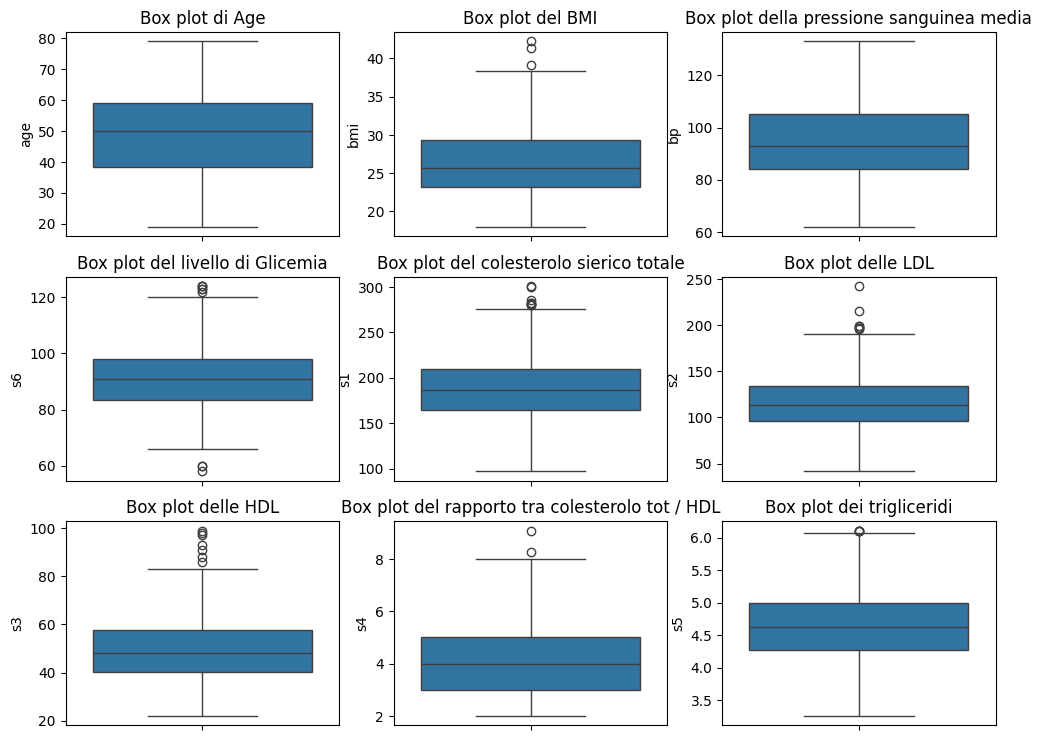

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

axes = axes.flatten() # ci permette di rendere flat axes

sns.boxplot(y='age', data=df, ax=axes[0])
axes[0].set_title("Box plot di Age")

sns.boxplot(y='bmi', data=df, ax=axes[1])
axes[1].set_title("Box plot del BMI")


sns.boxplot(y='bp', data=df, ax=axes[2])
axes[2].set_title("Box plot della pressione sanguinea media")

sns.boxplot(y='s6', data=df, ax=axes[3])
axes[3].set_title("Box plot del livello di Glicemia")

sns.boxplot(y='s1', data=df, ax=axes[4])
axes[4].set_title("Box plot del colesterolo sierico totale")

sns.boxplot(y='s2', data=df, ax=axes[5])
axes[5].set_title("Box plot delle LDL")

sns.boxplot(y='s3', data=df, ax=axes[6])
axes[6].set_title("Box plot delle HDL")

sns.boxplot(y='s4', data=df, ax=axes[7])
axes[7].set_title("Box plot del rapporto tra colesterolo tot / HDL")

sns.boxplot(y='s5', data=df, ax=axes[8])
axes[8].set_title("Box plot dei trigliceridi")

Grazie a questi boxplot possiamo apprezzare la distribuzione di ogni feature, cosi come il valore medio e gli outliners.

Text(0.5, 1.0, 'Distribuzione dei sessi')

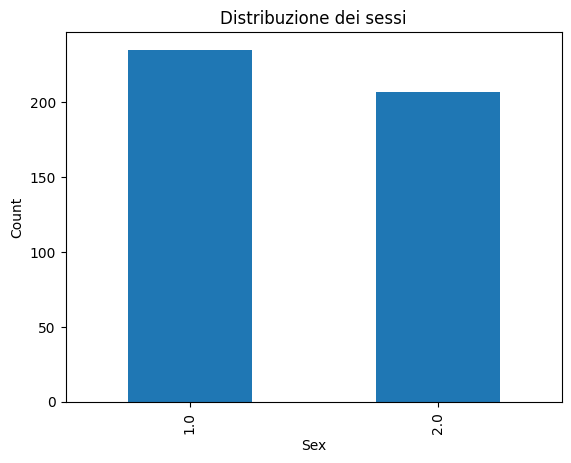

In [ ]:
df['sex'].value_counts().plot.bar()
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribuzione dei sessi')


In [ ]:
df["sex"].value_counts()

,count
sex,
1.0,235
2.0,207


Notiamo inoltre che abbiamo più entries Maschili che femminili.

### Visualizzazione delle entries che sono Outliers

In [ ]:
# applicazione filtro per individuare gli outliers della feature glicemia (s6)

filtro_outliner_glicemia = (df['s6'] > 120) | (df['s6'] < 65)
outlier_glicemia = df[filtro_outliner_glicemia]
outlier_glicemia.sort_values(by='s6', ascending=False)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
23,61.0,2.0,32.0,103.67,210.0,85.2,35.0,6.00,6.1070,124.0
117,65.0,1.0,24.4,120.00,222.0,135.6,37.0,6.00,5.5094,124.0
350,41.0,2.0,32.0,126.00,198.0,104.2,49.0,4.00,5.4116,124.0
428,62.0,2.0,34.6,120.00,215.0,129.2,43.0,5.00,5.3660,123.0
141,41.0,1.0,30.8,81.00,214.0,152.0,28.0,7.60,5.1358,123.0
168,49.0,2.0,31.9,94.00,234.0,155.8,34.0,7.00,5.3982,122.0
84,49.0,1.0,22.7,65.33,168.0,96.2,62.0,2.71,3.8918,60.0
245,41.0,1.0,23.1,86.00,148.0,78.0,58.0,3.00,4.0943,60.0
406,33.0,1.0,18.9,70.00,162.0,91.8,59.0,3.00,4.0254,58.0


In [ ]:
# applicazione filtro per individuare gli outliers della feature bmi

filtro_outlier_bmi = df["bmi"] > 36
outlier_bmi = df[filtro_outlier_bmi]
outlier_bmi.sort_values(by='bmi', ascending=False)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
367,46.0,2.0,42.2,99.0,211.0,137.0,44.0,5.00,5.0106,99.0
256,35.0,1.0,41.3,81.0,168.0,102.8,37.0,5.00,4.9488,94.0
366,36.0,2.0,39.1,90.0,219.0,135.8,38.0,6.00,5.4205,103.0
145,37.0,1.0,38.3,113.0,165.0,94.6,53.0,3.00,4.4659,79.0
262,44.0,2.0,38.2,123.0,201.0,126.6,44.0,5.00,5.0239,92.0
32,58.0,2.0,38.0,103.0,150.0,107.2,22.0,7.00,4.6444,98.0
405,62.0,2.0,37.8,119.0,113.0,51.0,31.0,4.00,5.0434,84.0
327,69.0,1.0,37.0,103.0,207.0,131.4,55.0,4.00,4.6347,90.0
138,58.0,2.0,36.7,117.0,166.0,93.8,44.0,4.00,4.9488,109.0
114,55.0,1.0,36.6,113.0,199.0,94.4,43.0,4.63,5.7301,97.0


In [ ]:
# applicazione filtro per individuare gli outliers della feature HDL (s3)

filtro_outlier_HDL = df["s3"] > 90
outlier_HDL = df[filtro_outlier_HDL]
outlier_HDL.sort_values(by='s3', ascending=False)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
58,60.0,1.0,20.4,105.0,198.0,78.4,99.0,2.0,4.6347,79.0
261,62.0,1.0,22.5,125.0,215.0,99.0,98.0,2.0,4.4998,95.0
441,36.0,1.0,19.6,71.0,250.0,133.2,97.0,3.0,4.5951,92.0
269,51.0,1.0,23.4,87.0,220.0,108.8,93.0,2.0,4.5109,82.0
260,60.0,1.0,25.6,78.0,195.0,95.4,91.0,2.0,3.7612,87.0


In [ ]:
# applicazione filtro per individuare gli outliers della feature LDL (s2)

filtro_outlier_LDL = df["s2"] > 190
outlier_LDL = df[filtro_outlier_LDL]
outlier_LDL.sort_values(by='s2', ascending=False)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
123,50.0,2.0,29.6,94.33,300.0,242.4,33.0,9.09,4.8122,109.0
230,38.0,2.0,33.0,78.00,301.0,215.0,50.0,6.02,5.1930,108.0
161,36.0,2.0,32.3,115.00,286.0,199.4,39.0,7.00,5.4723,112.0
376,48.0,1.0,32.7,93.00,276.0,198.6,43.0,6.42,5.1475,91.0
248,37.0,1.0,30.8,112.00,282.0,197.2,43.0,7.00,5.3423,101.0
346,50.0,2.0,28.0,104.00,282.0,196.8,44.0,6.00,5.3279,95.0
287,61.0,1.0,25.8,90.00,280.0,195.4,55.0,5.00,4.9972,90.0
414,71.0,2.0,27.0,93.33,269.0,190.2,41.0,6.56,5.2417,93.0


In [ ]:
# applicazione filtro per individuare gli outliers della feature colesterolo sierico totale (s1)

filtro_outlier_colesterolo_tot = df["s1"] > 270
outlier_colesterolo_tot = df[filtro_outlier_colesterolo_tot]
outlier_colesterolo_tot.sort_values(by='s1', ascending=False)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
230,38.0,2.0,33.0,78.00,301.0,215.0,50.0,6.02,5.1930,108.0
123,50.0,2.0,29.6,94.33,300.0,242.4,33.0,9.09,4.8122,109.0
161,36.0,2.0,32.3,115.00,286.0,199.4,39.0,7.00,5.4723,112.0
248,37.0,1.0,30.8,112.00,282.0,197.2,43.0,7.00,5.3423,101.0
346,50.0,2.0,28.0,104.00,282.0,196.8,44.0,6.00,5.3279,95.0
202,71.0,2.0,26.5,105.00,281.0,173.6,55.0,5.00,5.5683,84.0
276,52.0,1.0,28.8,113.00,280.0,174.0,67.0,4.00,5.2730,86.0
287,61.0,1.0,25.8,90.00,280.0,195.4,55.0,5.00,4.9972,90.0
376,48.0,1.0,32.7,93.00,276.0,198.6,43.0,6.42,5.1475,91.0


### Analisi delle relazioni delle features tra loro e con il target

In [ ]:
df_with_target = diabetes.frame

In [ ]:
df_with_target.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<Axes: >

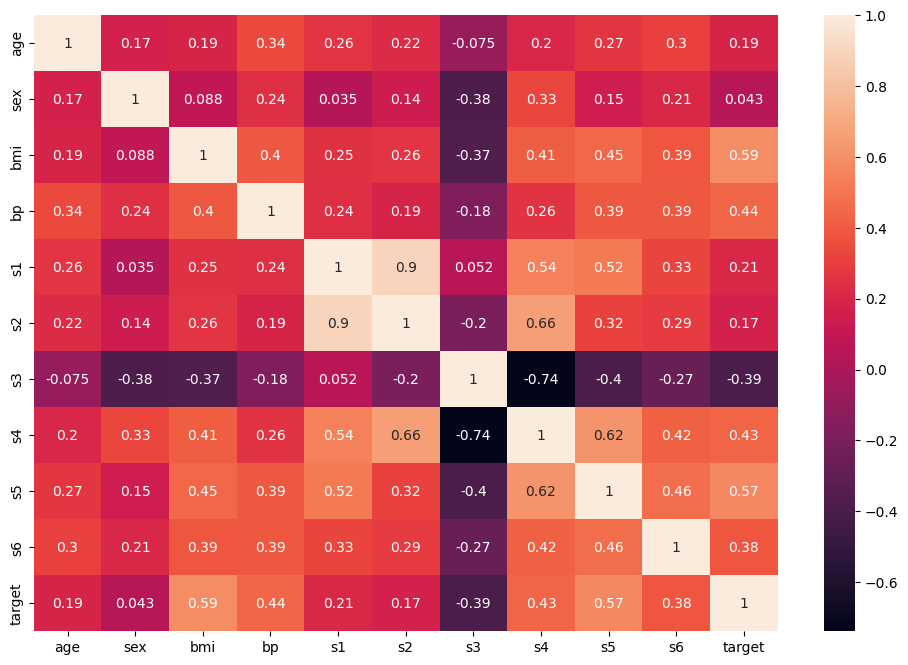

In [ ]:
plt.figure(figsize=(12, 8))

sns.heatmap(data=df_with_target.corr(), annot=True)

In [ ]:
# Solo la colonna di correlazione del target

df_with_target.corr()['target'].sort_values()

,target
s3,-0.394789
sex,0.043062
s2,0.174054
age,0.187889
s1,0.212022
s6,0.382483
s4,0.430453
bp,0.441482
s5,0.565883
bmi,0.586450


Dalla Heatmap di correlazione notiamo che bmi e s5 (trigliceridi) sembrano avere la maggiore correlazione lineare con il target quindi sembrano essere i maggiori predittori di progressione del diabete.

Quindi valori maggiori di bmi e trigliceridi sembrano essere associati a una maggiore progressione della malattia.

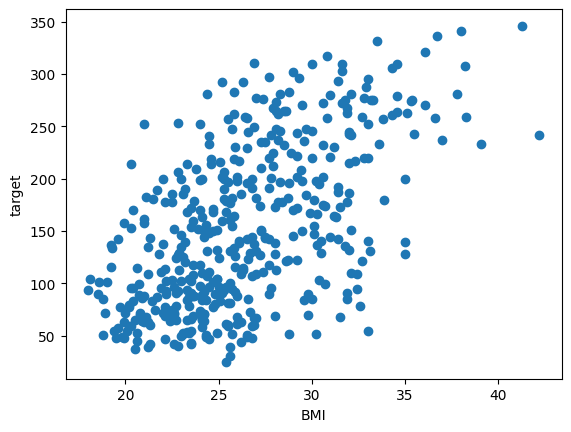

In [ ]:
plt.scatter(df_with_target['bmi'],df_with_target['target'], marker='o')
plt.xlabel('BMI')
plt.ylabel('target')
plt.show()

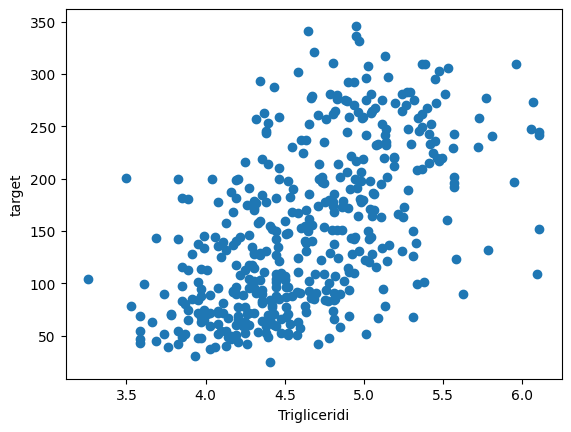

In [ ]:
plt.scatter(df_with_target['s5'],df_with_target['target'], marker='o')
plt.xlabel('Trigliceridi')
plt.ylabel('target')
plt.show()

Inoltre s3 quindi la densità delle HDL ha una correlazione di -0,39 quindi indica che all'aumentare dei livelli di HDL (colesterolo buono) la progressione del diabete tende a diminuire.

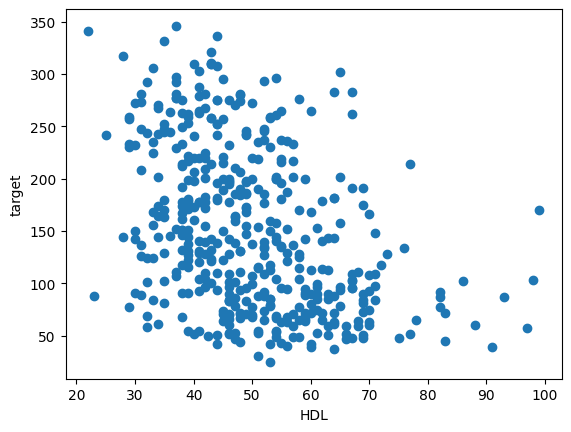

In [ ]:
plt.scatter(df_with_target['s3'],df_with_target['target'], marker='o')
plt.xlabel('HDL')
plt.ylabel('target')
plt.show()

Tutte le altre correlazioni sono moderate.

Inoltre se guardiamo le correlazioni tra le features notiamo che S1 e S2 hanno una correlazione positiva di 0.90 che suggerische una potenziale collinearità tra queste due variabili.

Ed anche S3 e S4 hanno una forte correlazione negativa, atteso dato che S4 è un rapporto che include S3 nell'equazione.

## 3. Pulizia e Pre-processing dei dati, ma prima della standardizzazione divisione in set di training e set di testing.

In [ ]:
df_with_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


Non abbiamo mancanza di dati quindi non servirà nessuna imputazione dei dati mancanti, o pulizia delle entries incomplete.

Tutte le Features sono di tipo float64 quindi non avremo nemmeno nessuna encoding particolare.

Grazie ai boxplot di prima abbiamoa vuto modo di poter vedere la distribuzione delle features e notiamo come in alcune abbiamo la presenza di outliner e potrebbe essere utile applicare delle trasformazioni di potenza cosi da rendere le distribuzioni piu simmetriche ma per adesso teniamola solo in considerazione questa ipotesi.

Non ci resta che standardizzare tutti i valori tranne il sesso che di base è una variabile binaria.

Ma prima di fare questo dobbiamo andare a dividere tutto il dataset in set di dati usati per il training e set di dati usato per il test.

In [ ]:
# Creazione della variabile indipendente X e dipendente y

X = df_with_target.drop('target', axis=1)
y = df_with_target['target']

In [ ]:
# Divisione: 80% di training e 20% di test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=RANDOM_STATE)

In [ ]:
X_train.shape

(353, 10)

In [ ]:
X_test.shape

(89, 10)

In [ ]:
y_train.shape

(353,)

In [ ]:
y_test.shape

(89,)

Abbiamo creato il set di training ed il set di test del modello.

In [ ]:
# Inizializzazione dello scaler

ss = StandardScaler()


# Fit sui dati di training

ss.fit(X_train)


# Transform sui dati di training X e anche sui dati di test X
X_train_standardized = ss.transform(X_train)
X_test_standardized = ss.transform(X_test)

In questa maniera andiamo a fare il fit sui dati di training e utilizziamo quei valori per standardizzare anche i dati di test, cosi non provochiamo data leakage, evitiamo quindi di trasferire informazioni dal test set al train set.

## 3.5 Creazione di modelli Lineari Multipli e polinomiali

Per capire come siano i valori di MSE e R2 da cui partiamo con i modelli normali.

### Regressione lineare multipla

Creiamo una funzione di valutazione che ci permetta di valutare i vari modelli che creeremo, prende in input il modello già addestrato la funzione `valutazione_modello`.

In [ ]:
# Creazione funzione di valutazione dei modelli già addestrati

def valutazione_modello(model, X_eval, y_eval):
  """
  Valuta un modello di regressione sui dati forniti.

  Args:
    model: Il modello di regressione addestrato.
    X_eval: Features del set di valutazione.
    y_eval: Target del set di valutazione.

  """

  y_pred = model.predict(X_eval)

  mse = mean_squared_error(y_eval,y_pred)
  r2 = r2_score(y_eval, y_pred)


  print(f"L'MSE è: {mse:.2f}")
  print(f"L'R2 è : {r2:.2f}")

  return mse, r2

Proviamo a vedere i risultati effettuando una normale regressione lineare multipla, quindi addestrando sul set di addestramento 80% e valutando poi il modello sia sul set di addestramento che sul set di test.

In [ ]:
lr = LinearRegression()

lr.fit(X_train_standardized, y_train)

LinearRegression()

In [ ]:
valutazione_modello(lr,X_train_standardized,y_train)

L'MSE è: 2734.75
L'R2 è : 0.55


(2734.7508990757424, 0.5539250081377072)

In [ ]:
valutazione_modello(lr,X_test_standardized,y_test)

L'MSE è: 3424.26
L'R2 è : 0.33


(3424.259334298692, 0.3322332173106184)

Vediamo come abbiamo degli R2 bassi sia nel caso del set di train che del set di test ma vediamo che diminuisce drasticamente tra i due quindi possiamo avvanzare anche l'idea che memorizza troppo il set di addestramento in quanto il valore di R2 è molto piu alto nel primo caso che nel secondo caso.

### Regressione polinomiale multipla

Adesso proveremo ad applicare una regressione polinomiale all'interno di un ciclo con più gradi.

1. Faremo il fit di `PolynomialFeatures` con i dati di addestramento x_train_standardized ed il fit della `LinearRegression` sempre con il set di addestramento.

2. A questo punto creeremo la variabile delle features polinomiale con il solo transform di `PolynomialFeatures` (fittato solo con il set di addestramento in maniera da evitare il data leakage)

3. Valuteremo ogni modello (dove abbiamo usato le features polinomiali) con la funzione `valutazione_modello`.


In [ ]:
for grade in [2,3,4]:

  print(f"\nIterazione con Grado:{grade}")
  print("\n")
  poly = PolynomialFeatures(grade)

  poly.fit(X_train_standardized)

  X_train_polinomial = poly.transform(X_train_standardized) # creazione features polinomiali

  print(f"Hai ottenuto X_train con una dimensione di {X_train_polinomial.shape}")

  print(f"\nRisultato set di train \n")
  lr = LinearRegression()
  lr.fit(X_train_polinomial, y_train) # memorizzazione coefficienti x calcolo


  valutazione_modello(lr,X_train_polinomial,y_train)

  print(f"\nRisultato set di test \n")


  X_test_polinomial = poly.transform(X_test_standardized)


  valutazione_modello(lr, X_test_polinomial, y_test)



Iterazione con Grado:2


Hai ottenuto X_train con una dimensione di (353, 66)

Risultato set di train 

L'MSE è: 2256.06
L'R2 è : 0.63

Risultato set di test 

L'MSE è: 3637.15
L'R2 è : 0.29

Iterazione con Grado:3


Hai ottenuto X_train con una dimensione di (353, 286)

Risultato set di train 

L'MSE è: 692.95
L'R2 è : 0.89

Risultato set di test 

L'MSE è: 33982.97
L'R2 è : -5.63

Iterazione con Grado:4


Hai ottenuto X_train con una dimensione di (353, 1001)

Risultato set di train 

L'MSE è: 0.00
L'R2 è : 1.00

Risultato set di test 

L'MSE è: 155904.42
L'R2 è : -29.40


Limitando i gradi della PolynomialFeatures a 3 vediamo come i risultati indicano che ci sia un forte overfitting che aumenta, aumentando i gradi.

## 4-5-6 Selezione delle Variabili, Creazione Modello di Regressione, Valutazione del Modello

A questo punto per migliorare la precisione del modello useremo Feature selection tramite regressione Lasso per identificare solo le variabili più influenti. E valuteremo il modello a diversi gradi di `PolynomialFeatures()` e a diversi valori di Alpha applicati tramite `Lasso()`.

In [ ]:
for grade in [2,3,4]:

  print(f"\nIterazione con Grado:{grade}")
  print("\n")
  poly = PolynomialFeatures(grade)

  poly.fit(X_train_standardized)

  X_train_polinomial = poly.transform(X_train_standardized) # creazione features polinomiali

  print(f"Hai ottenuto X_train con una dimensione di {X_train_polinomial.shape}")


  for valori_di_alpha in np.arange(0,4,0.1):
    print(f"\n Iterazione con alpha= {valori_di_alpha}")
    print(f"\nRisultato set di train \n")
    model = Lasso(alpha=valori_di_alpha)
    model.fit(X_train_polinomial, y_train) # memorizzazione coefficienti x calcolo


    valutazione_modello(model,X_train_polinomial,y_train)

    print(f"\nRisultato set di test \n")


    X_test_polinomial = poly.transform(X_test_standardized)


    valutazione_modello(model, X_test_polinomial, y_test)


Iterazione con Grado:2


Hai ottenuto X_train con una dimensione di (353, 66)

 Iterazione con alpha= 0.0

Risultato set di train 

L'MSE è: 2265.28
L'R2 è : 0.63

Risultato set di test 

L'MSE è: 3673.50
L'R2 è : 0.28

 Iterazione con alpha= 0.1

Risultato set di train 

L'MSE è: 2284.68
L'R2 è : 0.63

Risultato set di test 

L'MSE è: 3630.60
L'R2 è : 0.29

 Iterazione con alpha= 0.2

Risultato set di train 

L'MSE è: 2305.22
L'R2 è : 0.62

Risultato set di test 

L'MSE è: 3607.41
L'R2 è : 0.30

 Iterazione con alpha= 0.30000000000000004

Risultato set di train 

L'MSE è: 2323.73
L'R2 è : 0.62

Risultato set di test 

L'MSE è: 3598.18
L'R2 è : 0.30

 Iterazione con alpha= 0.4

Risultato set di train 

L'MSE è: 2338.76
L'R2 è : 0.62

Risultato set di test 

L'MSE è: 3573.73
L'R2 è : 0.30

 Iterazione con alpha= 0.5

Risultato set di train 

L'MSE è: 2356.38
L'R2 è : 0.62

Risultato set di test 

L'MSE è: 3539.51
L'R2 è : 0.31

 Iterazione con alpha= 0.6000000000000001

Risultato set d

A questo punto possiamo notare come i modelli con feature polinomiali di grado 3 e 4 sembrano essere inadatti, a valori alti di alpha sembrano essere equamente buoni a quelli di grado 2 ma con grado 3 e 4 andiamo a elevare troppo la dimensionalità (rispettivamente 286 features e 1001 features) per cui continueremo con il Grado 2 con tanto di Lasso().

###  Utilizzo di Cross-Validation per trovare l'iperparametro alpha migliore  

Useremo la Cross-validation per andare a l'iperparametro alpha migliore per il modello Lasso() di grado 2 senza sprecare il set di test per la selezione degli iperparametri.

In [ ]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('lasso', Lasso(random_state=RANDOM_STATE))
])

param_grid = {
    'lasso__alpha': np.arange(0.1,4.0,0.1)
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')

grid_search.fit(X_train_standardized, y_train)

print("Migliori parametri trovati da GridSearchCV:")
print(grid_search.best_params_)
print("\nMigliori score R2 trovati durante la cross-validation:")
print(grid_search.best_score_)

Migliori parametri trovati da GridSearchCV:
{'lasso__alpha': np.float64(2.4000000000000004)}

Migliori score R2 trovati durante la cross-validation:
0.5243979373943659


## Creazione del Modello di Regressione Finale con anche Learning Curve associata per la valutazione

In [ ]:
# Miglior valore di Alpha definito con GridSearchCV()

miglior_alpha = grid_search.best_params_['lasso__alpha']

# Definizione della Pipeline finale con il miglior lpha e grado 2

final_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('lasso', Lasso(alpha=miglior_alpha, random_state=RANDOM_STATE))
])

# Training del modello finale in tutto i training set (standardizzato)

final_pipeline.fit(X_train_standardized, y_train)

# Valutazione del modello finale nel set di test (standardizzato)

print("Performance del modello finale sul set di test:")
valutazione_modello(final_pipeline, X_test_standardized, y_test)

Performance del modello finale sul set di test:
L'MSE è: 3301.29
L'R2 è : 0.36


(3301.2889572088743, 0.35621374128929806)

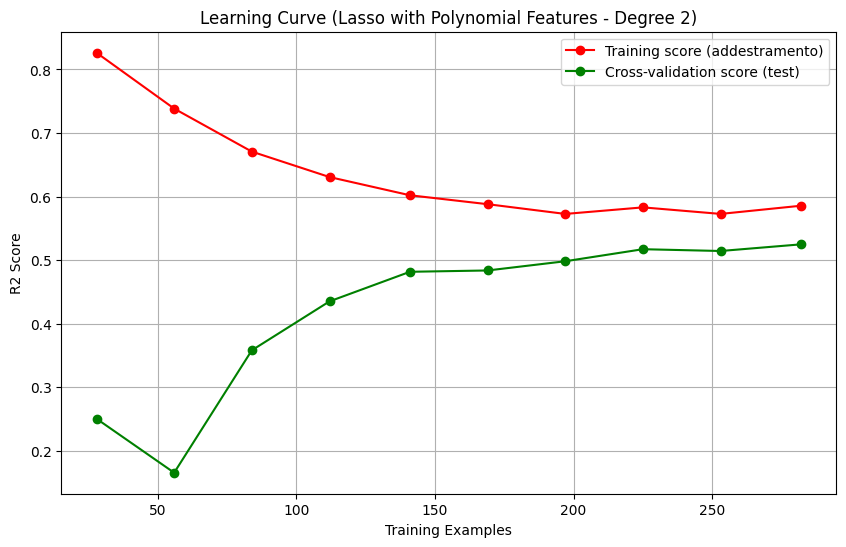

In [ ]:
# Generazione learning curve
train_sizes, train_scores, test_scores = learning_curve(
    final_pipeline,
    X_train_standardized, # uso dei dati di training
    y_train,
    cv=5, # uso di cross-validation nel set di addestramento
    scoring='r2', # Uso di R2 come metrica di scoring
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10) # Uso di 10 misure
)

# Calcolo della media dei scores di addestramento e di test
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


# Plot della learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve (Lasso with Polynomial Features - Degree 2)")
plt.xlabel("Training Examples")
plt.ylabel("R2 Score")
plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score (addestramento)")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score (test)")

plt.legend(loc="best")
plt.show()

Le due curve sembrano convergere man mano che la dimensione del set di training aumenta e questa indica che il modello sta imparando a generalizzare meglio con più dati.

Il punteggio di training R2 è più alto del punteggiop di cross-validation (Che riflette le performance su dati non visti durante l'addestramento).

Dato che le curve stanno convergendo, e non hanno raggiunto un Plateu potrebbe essere che aggiungendo più dati di training possa aiutare a ridurre il gap tra le curve e potenzialmente migliorare le performance.

Considerando i risultati del Grado 3 e 4 che mostravano overfitting ingestibile, il modello di Grado 2 con Lasso(alpha=2.4) è un buon compromesso.

Si potrebberò però esplorare altri modelli o tecniche di Feature Engineering come la PCA in maniera da selezionare solo le feature che spiegano di più il target seppur già Lasso() provveda a fare un pò di Feature selection.



 ## 7. Esportazione tramite pickle

`Pickle` salva il fine sempre come un flusso di byte e non come testo leggibile, quindi bisogna aprire il file in cui scriveremo in scrittura binaria `'wb'`.

In [ ]:
import pickle # Serve per serializzazione o deserializzazione oggetti Python

# filename in cui verrà salvato il modello
model_filename = 'diabetes_progression_model.pkl'

# Esportazione modello con pickle
try:
    with open(model_filename, 'wb') as f:
        pickle.dump(final_pipeline, f) # funzione di esportazione
    print(f"Modello esportato con successo in '{model_filename}'")
except Exception as e:
    print(f"Errore durante l'esportazione del modello: {e}")

Modello esportato con successo in 'diabetes_progression_model.pkl'


Una volta esportato, si può caricare il modello in un altro script o ambiente per fare nuove previsioni.

In [ ]:
# filename in cui lo abbiamo salvato
model_filename = 'diabetes_progression_model.pkl'

# caricamento dal file
try:
    with open(model_filename, 'rb') as f: # lettura binaria 'rb'
        loaded_model = pickle.load(f) #funzione principale per il caricalmento
    print(f"Modello caricato con successo da '{model_filename}'")

except FileNotFoundError:
    print(f"Errore: il file del modello '{model_filename}' non è stato trovato.")
except Exception as e:
    print(f"Errore durante il caricamento del modello: {e}")

Modello caricato con successo da 'diabetes_progression_model.pkl'
